In [1]:
import numpy as np
import matplotlib.pyplot as plt
data = np.loadtxt('http://scipy-lectures.org/_downloads/populations.txt')

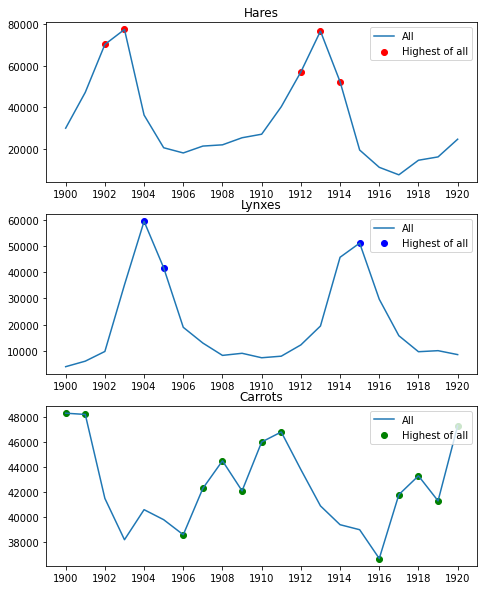

In [2]:
#Find which year each species had the largest population. Mark these years in the plot of populations.
a = np.array([(np.argmax(data[i, 1:]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
a0 = a[1][a[0] == 0]
a1 = a[1][a[0] == 1]
a2= a[1][a[0] == 2]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[a0,0], data[a0,1], c='r')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[a1,0], data[a1,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[a2,0], data[a2,3], c='g')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Highest of all'), loc='upper right')
plt.show()

['H' 'H' 'H' 'H' 'L' 'L' 'L' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'H' 'L' 'L' 'L'
 'H' 'H' 'H']


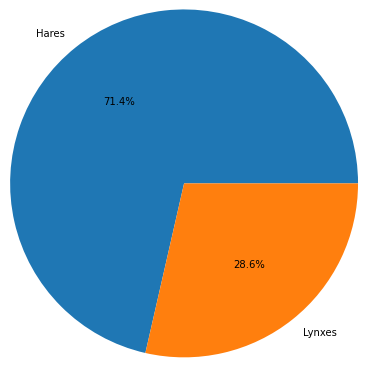

In [3]:
#Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...].
#Plot a pie chart showing ratio of "H" and "L" values obtained.
a = np.array([(np.argmax(data[i, 1:3]), i) for i in range(len(data[:,0]))])
a = np.transpose(a)
x = a[0] == 0
x1 = np.array([int(x[i]) * "H"+ (1 -int(x[i])) * "L" for i in range(len(x))])
a1 = [len(x1[x1 == 'H']) / len(a[0]), (len(x1[x1=='L']) )/len(a[0])] 
print(x1)
plt.pie(a1, labels = ['Hares', 'Lynxes'], autopct='%1.1f%%', radius = 2 )
plt.show()

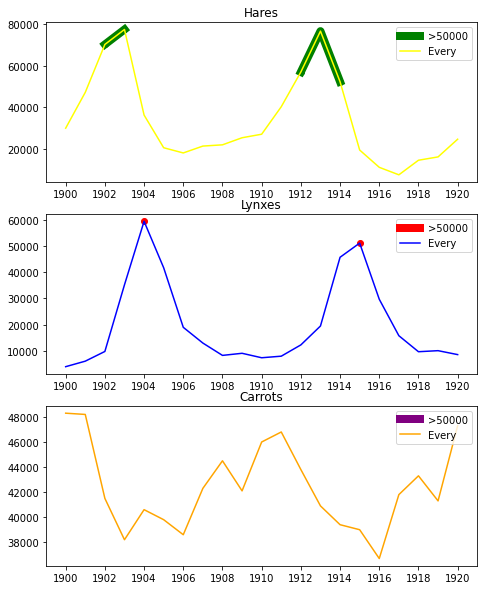

In [4]:
#Find which years any of the populations is above 50000.
#Show time periods where populations are above 50000 in the plot of populations.
x = data[:,0]
y1 = np.ma.masked_where(data[:,1] < 50000, data[:,1])
y2 = data[:, 1]
z1 = np.ma.masked_where(data[:,2] < 50000, data[:,2])
z2 = data[:, 2]
w1 = np.ma.masked_where(data[:,3] < 50000, data[:,3])
w2 = data[:, 3]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
lines = plt.plot(x, y1, x, y2)
plt.setp(lines[1], c='yellow')
plt.setp(lines[0], linewidth=8, c='g')
plt.scatter(x, y1, c='g')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.subplot(3, 2, 3)
lines = plt.plot(x, z1, x, z2)
plt.setp(lines[1], c='blue')
plt.setp(lines[0], linewidth=8, c='r')
plt.scatter(x, z1, c='r')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.subplot(3, 2, 5)
lines = plt.plot(x, w1, x, w2)
plt.setp(lines[0], linewidth=8, c='purple')
plt.setp(lines[1], c='orange')
plt.scatter(x, w1, c='purple')
plt.legend(('>50000', 'Every'), loc ='upper right')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.show()

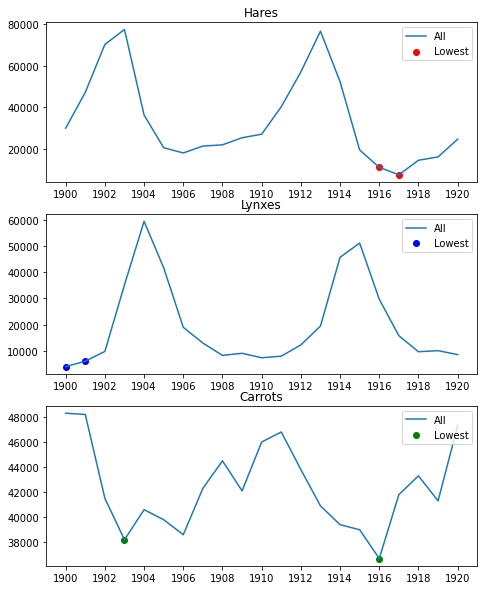

In [5]:
#Find the top 2 years for each species when they had the lowest populations.
y1 = np.argsort(data[:, 1])[:2]
y2 = np.argsort(data[:, 2])[:2]
y3 = np.argsort(data[:, 3])[:2]

plt.figure(figsize=(17,10))
plt.subplot(3, 2, 1)
plt.plot(data[:,0], data[:,1])
plt.scatter(data[y1,0], data[y1,1], c='r')
plt.title('Hares')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.subplot(3,2, 3)
plt.plot(data[:,0], data[:,2])
plt.scatter(data[y2,0], data[y2,2], c='b')
plt.title('Lynxes')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.subplot(3,2,5)
plt.plot(data[:,0], data[:,3])
plt.scatter(data[y3,0], data[y3,3], c='g')
plt.title('Carrots')
plt.xticks(data[:,0].astype(int)[::2])
plt.legend(('All', 'Lowest'), loc='upper right')
plt.show()

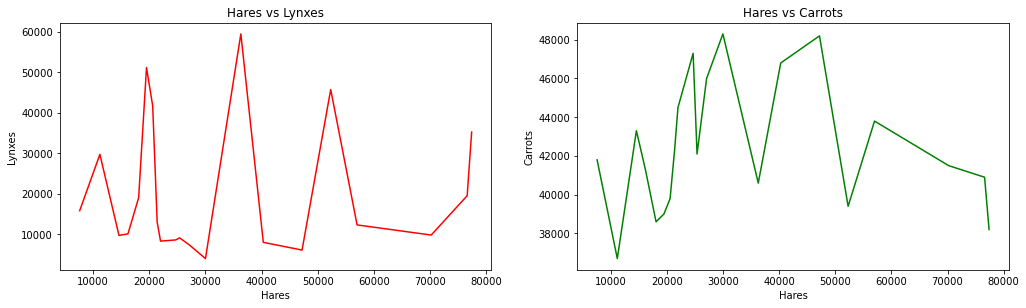

In [6]:
#Show population of hares vs carrots and hares vs lynxes.
hares = np.argsort(data[:, 1])
plt.figure(figsize=(17,10))
plt.subplot(2, 2, 1)
plt.plot(data[hares, 1], data[hares, 2], c='r')
plt.title('Hares vs Lynxes')
plt.xlabel('Hares')
plt.ylabel('Lynxes')
plt.subplot(2, 2, 2)
plt.plot(data[hares, 1], data[hares, 3], c= 'g')
plt.title('Hares vs Carrots')
plt.xlabel('Hares')
plt.ylabel('Carrots')
plt.show()

In [7]:
#Assume the population of hares in 1920 is unknown.
#Suggest a way to estimate this value.
#Compare an estimated value with the true value and print a ratio of the error to the true value.
#Will try to find median over all years and pretend that in 1920 it is equal to it

median = np.median(data[:20, 1])
print("Predicted value = {0}".format(median))
error = abs((median / data[20, 1]) - 1)
print("Error = {0:3.5f}".format(error))

Predicted value = 26250.0
Error = 0.06275


MNIST DATASET

In [9]:
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
digits_new = fetch_openml('mnist_784')
pca = PCA()
X_transformed = pca.fit_transform(digits_new.data.astype(float))

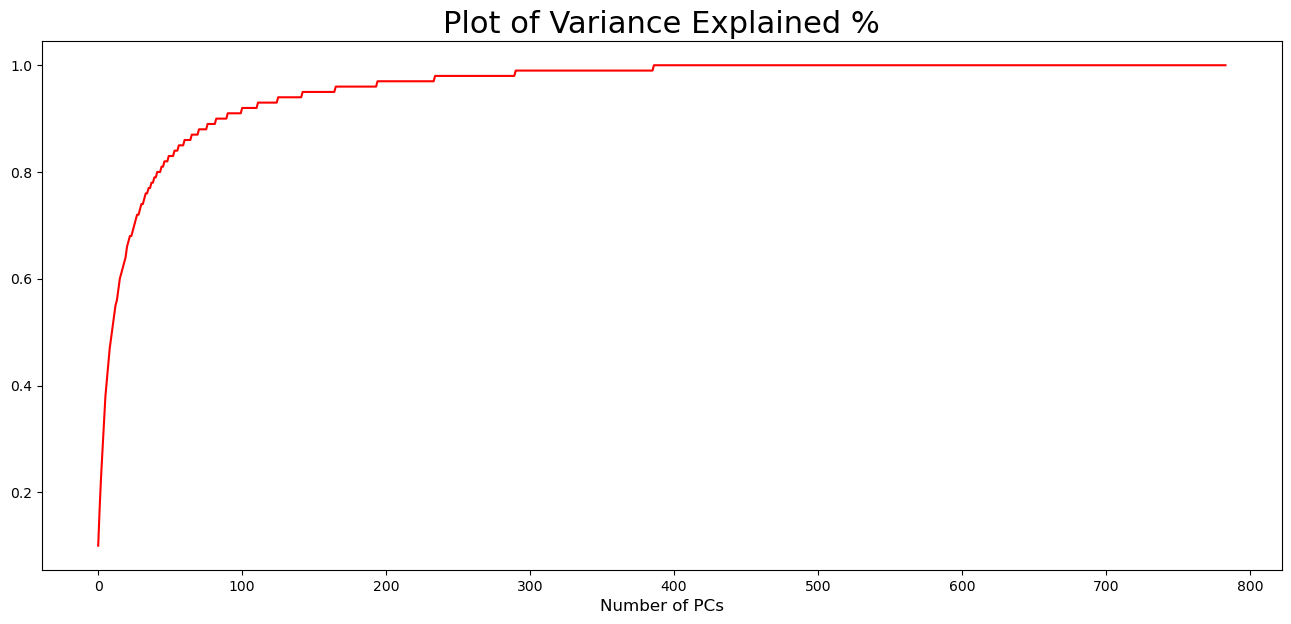

In [10]:
variance_explained_cumsum = pca.explained_variance_ratio_.cumsum().round(2)
fig, axes = plt.subplots(1,1,figsize=(16,7), dpi=100)
plt.plot(variance_explained_cumsum, color='red')
plt.title('Plot of Variance Explained %', fontsize=22)
plt.xlabel('Number of PCs', fontsize=12)
plt.show()

In [11]:
i = np.where(variance_explained_cumsum == 0.99)
k99 = int(round(np.mean(i)))
i = np.where(variance_explained_cumsum == 0.95)
k95 = int(round(np.mean(i)))
i = np.where(variance_explained_cumsum == 0.9)
k90 = int(round(np.mean(i)))
i = np.where(variance_explained_cumsum == 0.85)
k85 = int(round(np.mean(i)))
print('Number of PC for 99%, 95%, 90%, 85%:')
print(k99, k95, k90, k85)


Number of PC for 99%, 95%, 90%, 85%:
338 153 86 58


In [12]:
pca99 = PCA(k99)
X_transformed_99 = pca99.fit_transform(digits_new.data.astype(float))
X_restored_99 = pca99.inverse_transform(X_transformed_99)
pca95 = PCA(k95)
X_transformed_95 = pca95.fit_transform(digits_new.data.astype(float))
X_restored_95 = pca95.inverse_transform(X_transformed_95)
pca90 = PCA(k90)
X_transformed_90 = pca90.fit_transform(digits_new.data.astype(float))
X_restored_90 = pca90.inverse_transform(X_transformed_90)
pca85 = PCA(k85)
X_transformed_85 = pca85.fit_transform(digits_new.data.astype(float))
X_restored_85 = pca85.inverse_transform(X_transformed_85)

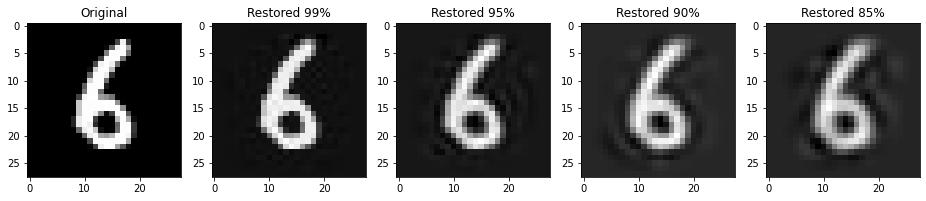

In [13]:
images_new = digits_new.data.reshape(-1, 28, 28)
i = 1020
fig, ax = plt.subplots(1, 5, figsize=(16, 7))
ax[0].imshow(images_new[i], cmap='gray')
ax[1].imshow(X_restored_99[i].reshape(28, 28), cmap='gray')
ax[2].imshow(X_restored_95[i].reshape(28, 28), cmap='gray')
ax[3].imshow(X_restored_90[i].reshape(28, 28), cmap='gray')
ax[4].imshow(X_restored_85[i].reshape(28, 28), cmap='gray')
ax[0].set_title('Original')
ax[1].set_title('Restored 99%')
ax[2].set_title('Restored 95%')
ax[3].set_title('Restored 90%')
ax[4].set_title('Restored 85%')
plt.show()